# **Задание №6**
## **Часть 1. Полиномиальная регрессия.** 

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
data = pd.read_csv('data matstat.txt', sep='\s+', header=None)
data = pd.DataFrame(data)

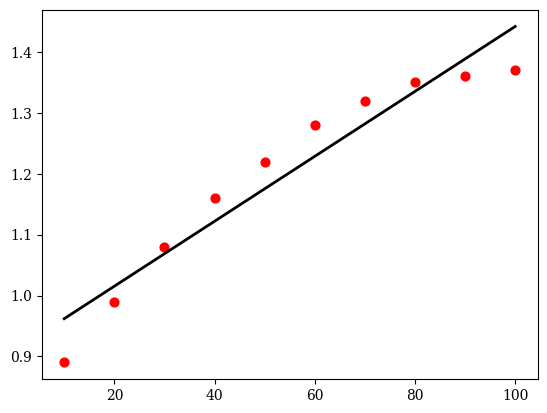

In [128]:
coefs = np.polyfit(data[0], data[1], 1)
polynom = np.poly1d(coefs)
plt.plot(data[0], polynom(data[0]), color="black", linewidth="2")
plt.scatter(data[0], data[1], color='red', s=40)
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data0 = data[0]
data1 = data[1]
data0 = data0.values.reshape(-1, 1)
data1 = data1.values
model = LinearRegression()
model.fit(data0, data1)
R2 = r2_score(data1, model.predict(data0))
print(R2)

0.9225769250930441


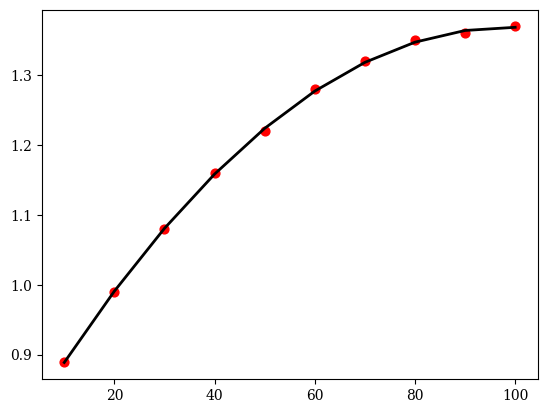

In [129]:
parabolaCoefs = np.polyfit(data[0], data[1], 2)
parabola = np.poly1d(parabolaCoefs)
plt.scatter(data[0], data[1], color='red', s=40)
plt.plot(data[0], parabola(data[0]), color="black", linewidth="2")
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
polyFeatures = PolynomialFeatures(degree=2)
dataFit = polyFeatures.fit_transform(data0)
model.fit(dataFit, data1)
R2 = r2_score(data1, model.predict(dataFit))
print(R2)

0.9997790056565021


In [30]:
polynom = np.poly1d(coefs)
print(polynom)

 
0.005333 x + 0.9087


In [31]:
polynom = np.poly1d(parabolaCoefs)
print(polynom)

            2
-6.098e-05 x + 0.01204 x + 0.7745


## **Соберем все результаты в один рисунок.**

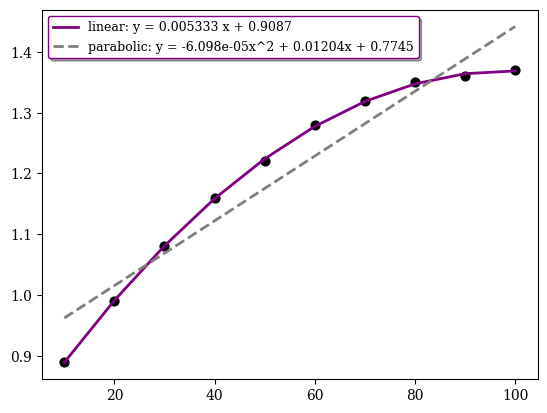

In [94]:
plt.plot(data[0], parabola(data[0]), color='purple', label='linear: y = 0.005333 x + 0.9087',linewidth=2)
plt.plot(data[0], polynom(data[0]), label='parabolic: y = -6.098e-05x^2 + 0.01204x + 0.7745', linewidth=2, color='grey', linestyle="--")
plt.scatter(data[0], data[1], color='black', s=40)
plt.legend(fontsize=9, shadow=True, framealpha=1, edgecolor='purple')
plt.show()

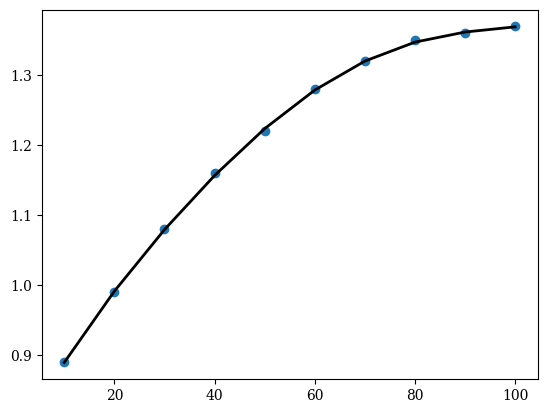

In [130]:
degFiveCoefs = np.polyfit(data[0], data[1], 5)
degFivePolynom = np.poly1d(degFiveCoefs)
plt.plot(data[0], degFivePolynom(data[0]), color="black", linewidth="2")
plt.scatter(data[0], data[1])
plt.show()

In [92]:
polyFeatures2 = PolynomialFeatures(degree=5)
dataFit2 = polyFeatures2.fit_transform(data0)
model.fit(dataFit2, data1)
R2 = r2_score(data1, model.predict(dataFit2))
print(R2)

0.9998467748113914


Результат оказался еще ближе к единице, точки лучше ложатся на прямую. Коэффициент детерминации $$R^{2} \neq 1$$, так как степень полинома все еще меньше объема предоставленной выборки. 

## **Часть 2. Степенная регрессия.**

In [98]:
powerCoef = np.polyfit(np.log(data[0]), np.log(data[1]), 1)
powerEquation = np.poly1d(powerCoef)
b = powerCoef[0]
a = np.exp(powerCoef[1])
powerLine = a * data[0]**b
print(powerEquation)

 
0.2017 x - 0.5947


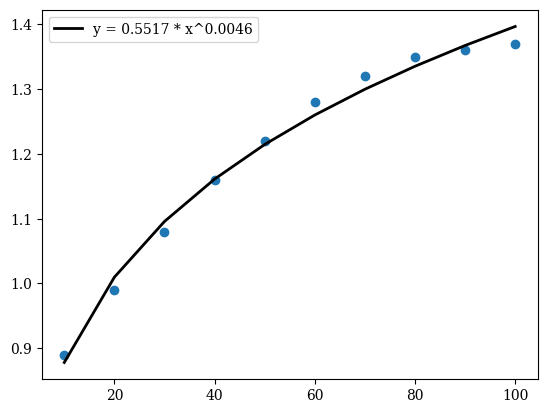

In [131]:
plt.plot(data[0], powerLine, label=f'y = {a:.4f} * x^{b:.4f}', color="black", linewidth="2")
plt.scatter(data[0], data[1])
plt.legend()
plt.show()

## **Часть 3. Экспоненциальная регрессия.**

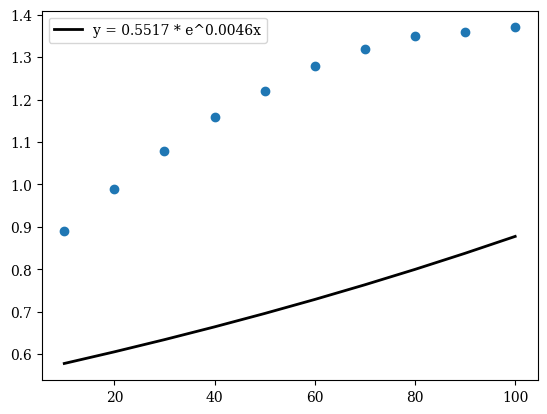

In [132]:
expCoef = np.polyfit(data[0], np.log(data[1]), 1)
expEquation = np.poly1d(expCoef)
b = expCoef[0]
a = np.exp(powerCoef[1])
expLine = a * np.exp(data[0] * b)
plt.plot(data[0], expLine, label=f'y = {a:.4f} * e^{b:.4f}x', color="black", linewidth="2")
plt.scatter(data[0], data[1])
plt.legend()
plt.show()

## **Часть 4. curve_fit().**

In [105]:
from scipy.optimize import curve_fit
def powerFunc(x, a, b):
    return a * x**b

def expFunc (x, a, b):
    return a * np.exp(x * b)
def f(x, y):
    l = []
    l.append(x)
    l.append(y)
    return l

x = f(1, 2)

x, y = f(1, 2)

x, _ = f(1, 2)

powerParams, _ = curve_fit(powerFunc, data[0], data[1])
aPow = powerParams[0]
bPow = powerParams[1]
powerFitLine = powerFunc(data[0], aPow, bPow)

print(f'y = {aPow:.4f} * x^{bPow:.4f}')

y = 0.5516 * x^0.2018


In [106]:
expParams, _ = curve_fit(expFunc, data[0], data[1])
aExp = expParams[0]
bExp = expParams[1]
expFitLine = expFunc(data[0], aExp, bExp)
print(f'y = {aExp:.4f} * e^{bExp:.4f}x')

y = -0.0000 * e^1.0000x


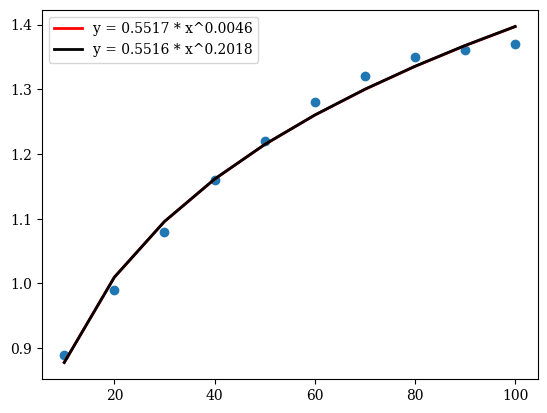

In [138]:
plt.plot(data[0], powerLine, 'r', label=f'y = {a:.4f} * x^{b:.4f}', linewidth="2")
plt.plot(data[0], powerFitLine, label=f'y = {aPow:.4f} * x^{bPow:.4f}', color="black", linewidth="2")
plt.scatter(data[0], data[1])
plt.legend()
plt.show()

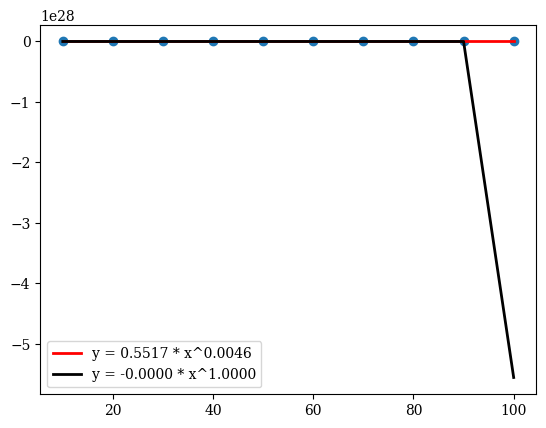

In [137]:
plt.plot(data[0], expLine, 'r', label=f'y = {a:.4f} * x^{b:.4f}', linewidth="2")
plt.plot(data[0], expFitLine, label=f'y = {aExp:.4f} * x^{bExp:.4f}', color="black", linewidth="2")
plt.scatter(data[0], data[1])
plt.legend()
plt.show()

In [139]:
data2 = pd.read_csv('data matstat2.txt', sep='\s+', header=None)
data2 = pd.DataFrame(data2)
labels = data2[3]
X = np.column_stack((data2[0], data2[1]))
print(X)

[[33.21 22.26]
 [28.61 19.32]
 [29.71 21.38]
 [30.75 20.79]
 [29.95 22.56]
 [30.91 22.41]
 [31.7  20.22]
 [31.26 21.65]
 [32.41 20.89]
 [28.87 20.46]
 [29.65 20.19]
 [32.14 23.63]
 [34.58 21.6 ]
 [30.78 22.36]
 [31.5  22.01]
 [30.19 21.79]
 [30.09 21.9 ]
 [30.94 21.47]
 [29.88 18.36]
 [31.53 19.85]
 [18.8  19.89]
 [18.03 20.36]
 [18.34 23.39]
 [18.95 20.43]
 [20.01 23.57]
 [18.07 22.45]
 [20.36 20.49]
 [16.57 24.17]
 [18.4  24.62]
 [17.17 20.02]
 [18.82 20.67]
 [18.35 21.13]
 [21.22 21.76]
 [19.24 23.1 ]
 [19.12 21.17]
 [16.73 20.26]
 [17.4  20.94]
 [21.22 21.11]
 [18.85 20.76]
 [20.35 19.06]
 [13.14 19.68]
 [14.01 22.4 ]
 [11.26 23.72]
 [15.18 23.29]
 [13.75 22.96]
 [15.26 23.76]
 [17.23 20.86]
 [16.83 17.91]
 [12.91 23.13]
 [15.28 20.69]
 [14.61 19.57]
 [11.47 22.89]
 [14.19 22.33]
 [14.57 21.58]
 [13.63 22.7 ]
 [15.07 19.98]
 [13.64 20.37]
 [14.7  21.33]
 [16.12 20.98]
 [10.82 17.59]]


In [115]:
print(labels)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    3
55    3
56    3
57    3
58    3
59    3
Name: 3, dtype: int64


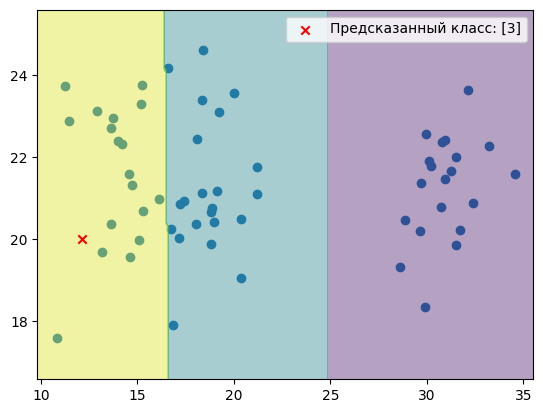

[[2.73897618e-34 1.22359462e-04 9.99877641e-01]]


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data2 = pd.read_csv('data matstat2.txt', sep='\s+', header=None)
data2 = pd.DataFrame(data2)
labels = data2[3]
X = np.column_stack((data2[0], data2[1]))
testPoint = np.array([[12.11, 20]])

lda = LinearDiscriminantAnalysis()

lda.fit(X, labels)

# Предсказываем класс для новой точки
predClass = lda.predict(testPoint)

# Вероятность принадлежности к каждому из класс
prob = lda.predict_proba(testPoint)

xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.1), np.arange(yMin, yMax, 0.1))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(data2[0], data2[1])

# Рисуем области классов
plt.contourf(xx, yy, Z, alpha=0.4)

# Добавляем новую точку
plt.scatter(testPoint[0, 0], testPoint[0, 1], c='red', marker='x', label=f'Предсказанный класс: {predClass}')

plt.legend()
plt.show()
print(prob)